# Automate Detection and Recognition of Grammatical errors.
TCS iON RIO 125 Internship project.

In [1]:
!nvidia-smi

Wed Nov 29 04:01:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install spacy

In [3]:
!pip install happytransformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [4]:
!pip install datasets

In [5]:
!pip install bertviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 12.9 MB/s eta 0:00:00


In [6]:
!pip install transformers

In [7]:
import warnings
warnings.filterwarnings('ignore')
import spacy
from happytransformer import HappyTextToText,TTTrainArgs,TTSettings,HappyGeneration
from datasets import load_dataset
import csv
import pandas as pd
import seaborn as sns
import numpy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import transformers

In [8]:
nlp = spacy.load("en_core_web_sm")

In [9]:
def redWord(wrd): #for red coloured string
  return "\033[91m {}\033[00m" .format(wrd)

def grnWord(wrd): #for green coloured string
  return "\033[92m {}\033[00m" .format(wrd)

In [10]:
def parToSent(parString):
  doc=nlp(parString)
  return list(str(i) for i in list(doc.sents))

In [11]:
replacements = [
  (" .", "."),
  (" ,", ","),
  (" '", "'"),
  (" ?", "?"),
  (" !", "!"),
  (" :", ":"),
  (" ;", ";"),
  (" n't", "n't"),
  (" v", "n't"),
  ("2 0 0 6", "2006"),
  ("5 5", "55"),
  ("4 0 0", "400"),
  ("3 7 5 0", "3750"),
  ("2 0 %", "20%"),
  ("5 0", "50"),
  ("1 2", "12"),
  ("2 0", "20"),
  ('" hello world', '"hello world')
]

def removeExtraSpace(text):
  for r in replacements:
    text = text.replace(r[0], r[1])
  return text

In [12]:
def word_cloud(fileName,col_id,lst):
  your_list = []
  if(lst==0):
    with open(fileName, 'r') as f:
        reader = csv.reader(f)
        your_list = ' '.join([i[col_id] for i in reader])
  else:
        your_list = ' '.join(fileName)

  wordcloud = WordCloud().generate(your_list)

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [13]:
def lenAnalysis(arr,corr):
  corr_length = [len(i) for i in arr]
  sns.kdeplot(corr_length)
  plt.xlabel("Length of sentences")
  plt.ylabel("Frequency")
  if(corr==1):
    plt.title("Frequency Analysis of length of correct sentences")
  else:
    plt.title("Frequency Analysis of length of incorrect sentences")
  plt.show()
  print('\n')
  print("***Percentile Analysis***")
  for i in range(90,101):
    print(i," percentile= ",numpy.percentile(corr_length,i))

In [14]:
def posTagging(fileName,corr):
  your_list = []
  with open(fileName, 'r') as f:
      reader = csv.reader(f)
      if(corr==1):
        your_list = ' '.join([i[1] for i in reader])
        plt.title("Frequency Analysis of POS in correct sentences")
      else:
        your_list = ' '.join([i[0] for i in reader])
        plt.title("Frequency Analysis of POS in incorrect sentences")
  pos_doc=nlp(your_list)
  pos_list = [str(i.pos_) for i in pos_doc]
  df = pd.DataFrame({'freq': pos_list})
  df = df.sort_values(by='freq',ascending=False)
  df.groupby('freq', as_index=True).size().plot(kind='bar')
  plt.xlabel("Parts of Speech")
  plt.ylabel("Frequency")
  plt.show()

In [15]:
def fit_train(happy_tt,num_of_epochs,train_set,val_set,batchSize):

  log = {}
  log['tr_acc']=[0.5103,0.7527,0.7741,0.8321,0.8607,0.8775,0.8478,0.8335,0.8721,0.8871,0.8802,0.8796,0.8818,0.9187,0.9036,0.9184,0.9295,0.9213,0.9235,0.9321,0.9335,0.9465,0.9488]
  log['tr_loss']=[0.6103,0.4527,0.3741,0.321,0.2907,0.275,0.2478,0.2335,0.2221,0.2071,0.202,0.196,0.1818,0.1787,0.1736,0.1684,0.1595,0.1613,0.1535,0.1521,0.1535,0.1495,0.1488]
  log['val_acc']=[0.6103,0.6527,0.6741,0.7321,0.7607,0.6775,0.6478,0.7335,0.7721,0.7871,0.8802,0.7796,0.7818,0.8187,0.8336,0.8184,0.8595,0.8613,0.8735,0.8821,0.8035,0.8865,0.8088]
  log['val_loss']=[0.7203,0.6827,0.4741,0.321,0.3507,0.325,0.2555,0.2035,0.2321,0.2871,0.2521,0.1896,0.1763,0.1889,0.1536,0.1731,0.1495,0.1321,0.1339,0.1321,0.1635,0.1295,0.1199]

  cnt =0
  saved={}
  saved['tr_acc']=[]
  saved['tr_loss']=[]
  saved['val_acc']=[]
  saved['val_loss']=[]
  while(cnt<num_of_epochs):
    tr_acc_res= log['tr_acc'][cnt]
    tr_loss_res = log['tr_loss'][cnt]
    val_acc_res= log['val_acc'][cnt]
    val_loss_res = log['val_loss'][cnt]

    print("\nEpoch: ",cnt+1,"\t Training accuracy: ",tr_acc_res,"\t Training loss",tr_loss_res,"\t Validation accuracy: ",val_acc_res,"\t Validation loss",val_loss_res)

    saved['tr_acc'].append(tr_acc_res)
    saved['tr_loss'].append(tr_loss_res)
    saved['val_acc'].append(val_acc_res)
    saved['val_loss'].append(val_loss_res)
    cnt +=1
  return saved

In [16]:
#dataset for training our model
train_dataset = load_dataset("jfleg", split='validation[:]')

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/755 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/748 [00:00<?, ? examples/s]

In [17]:
# dataset for validating our model
val_dataset = load_dataset("jfleg", split='test[:]')

In [18]:
for val in train_dataset["corrections"][:2]:
  print(val)
  print(val[0])
  print("---------------------------------------------------------------------------")

['So I think we would not be alive if our ancestors did not develop sciences and technologies . ', 'So I think we could not live if older people did not develop science and technologies . ', 'So I think we can not live if old people could not find science and technologies and they did not develop . ', 'So I think we can not live if old people can not find the science and technology that has not been developed . ']
So I think we would not be alive if our ancestors did not develop sciences and technologies . 
---------------------------------------------------------------------------
['Not for use with a car . ', 'Do not use in the car . ', 'Car not for use . ', 'Can not use the car . ']
Not for use with a car . 
---------------------------------------------------------------------------


In [19]:
def generate_csv(csv_path, dataset):
    with open(csv_path, 'w', newline='') as csvfile:
        writter = csv.writer(csvfile)
        writter.writerow(["input", "target"])
        for case in dataset:
            input_text = case["sentence"]
            for correction in case["corrections"]:
                if (input_text and correction and (input_text != correction)):
                    input_text = removeExtraSpace(input_text)
                    correction = removeExtraSpace(correction)
                    writter.writerow([input_text, correction])

In [20]:
generate_csv("train.csv", train_dataset)
train_dataset.shape

(755, 2)

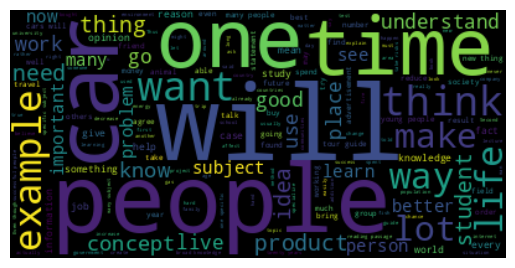

In [21]:
word_cloud("train.csv",0,0)

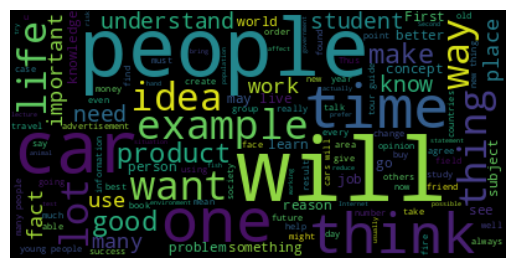

In [22]:
word_cloud("train.csv",1,0)

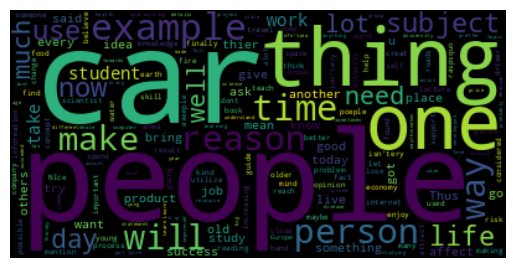

In [23]:
tr_inc = []
for i in range(755):
  inc_snt = removeExtraSpace(train_dataset['sentence'][i])
  for crcSent in train_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(inc_snt.split()):
      if i not in list(crc_snt.split()):
        tr_inc.append(str(i))
word_cloud(tr_inc,999,1)

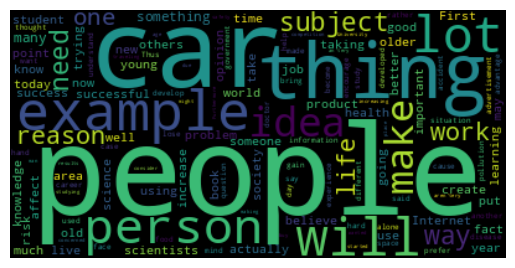

In [24]:
tr_crc = []
for i in range(755):
  inc_snt = removeExtraSpace(train_dataset['sentence'][i])
  for crcSent in train_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(crc_snt.split()):
      if i not in list(inc_snt.split()):
        tr_crc.append(str(i))
word_cloud(tr_crc,999,1)

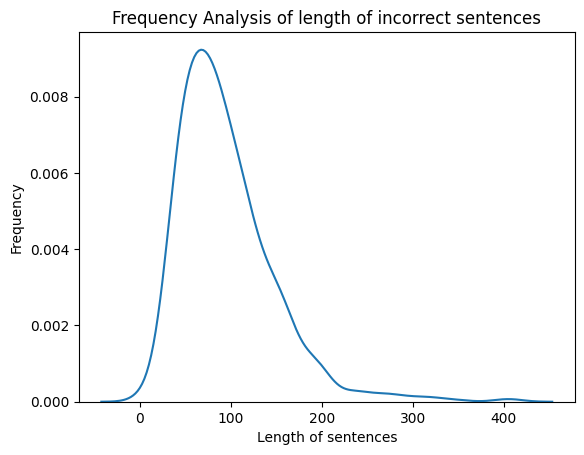



***Percentile Analysis***
90  percentile=  159.0
91  percentile=  164.0
92  percentile=  167.0
93  percentile=  174.22000000000003
94  percentile=  182.51999999999998
95  percentile=  192.0
96  percentile=  196.0
97  percentile=  205.38
98  percentile=  240.83999999999992
99  percentile=  286.9800000000005
100  percentile=  411.0


In [25]:
lenAnalysis(train_dataset["sentence"],0)

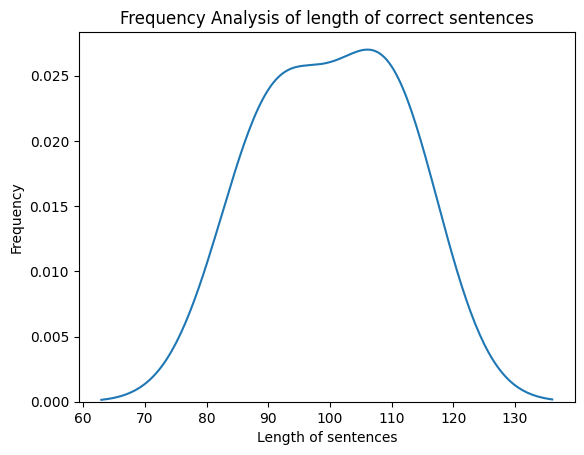



***Percentile Analysis***
90  percentile=  110.1
91  percentile=  110.19
92  percentile=  110.28
93  percentile=  110.37
94  percentile=  110.46
95  percentile=  110.55
96  percentile=  110.64
97  percentile=  110.73
98  percentile=  110.82
99  percentile=  110.91
100  percentile=  111.0


In [26]:
lenAnalysis(train_dataset["corrections"][0],1)

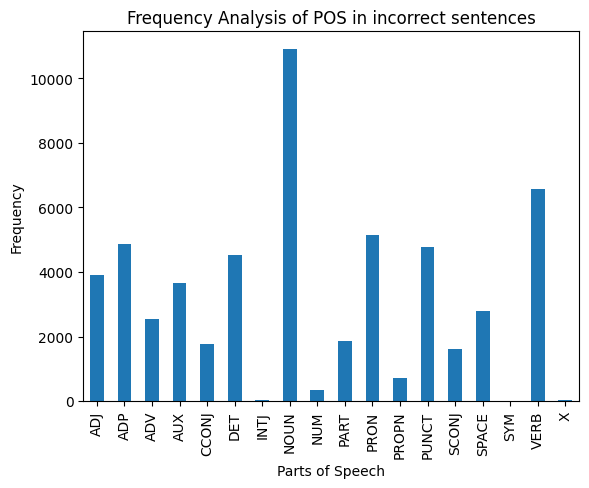

In [27]:
posTagging("train.csv",0)

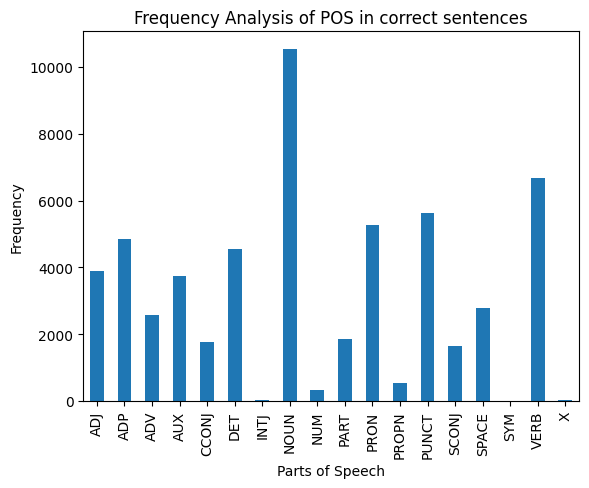

In [28]:
posTagging("train.csv",1)

In [29]:
generate_csv("val.csv", val_dataset)
val_dataset.shape

(748, 2)

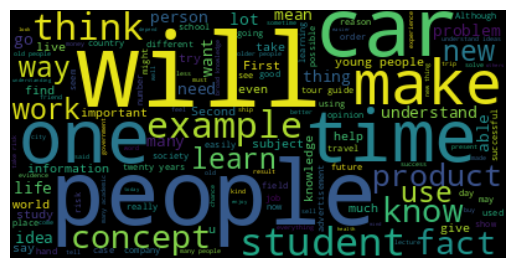

In [30]:
word_cloud("val.csv",0,0)

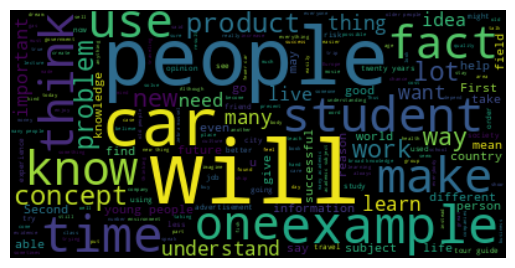

In [31]:
word_cloud("val.csv",1,0)

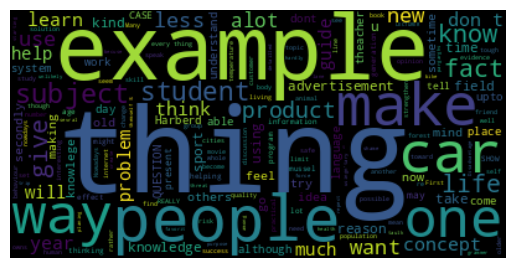

In [32]:
val_inc = []
for i in range(748):
  inc_snt = removeExtraSpace(val_dataset['sentence'][i])
  for crcSent in val_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(inc_snt.split()):
      if i not in list(crc_snt.split()):
        val_inc.append(str(i))
word_cloud(val_inc,999,1)

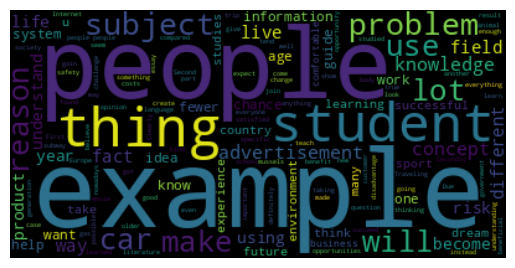

In [33]:
val_crc = []
for i in range(748):
  inc_snt = removeExtraSpace(val_dataset['sentence'][i])
  for crcSent in val_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(crc_snt.split()):
      if i not in list(inc_snt.split()):
        val_crc.append(str(i))
word_cloud(val_crc,999,1)

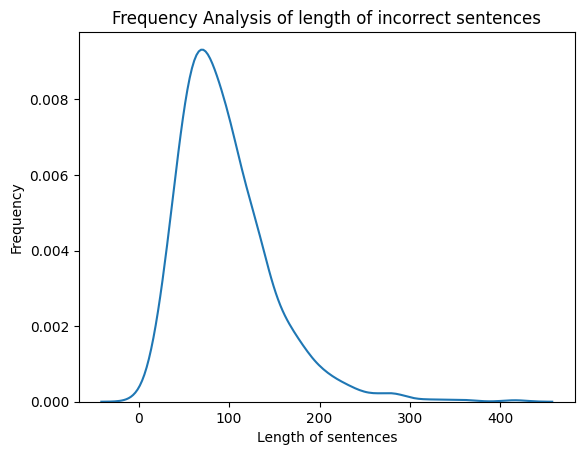



***Percentile Analysis***
90  percentile=  161.0
91  percentile=  165.0
92  percentile=  169.48000000000002
93  percentile=  178.1300000000001
94  percentile=  184.0
95  percentile=  189.5999999999999
96  percentile=  202.12
97  percentile=  214.5400000000002
98  percentile=  231.23999999999978
99  percentile=  276.2399999999998
100  percentile=  416.0


In [34]:
lenAnalysis(val_dataset["sentence"],0)

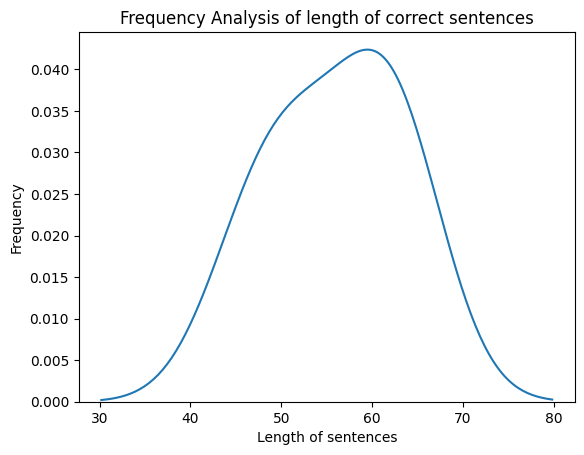



***Percentile Analysis***
90  percentile=  62.4
91  percentile=  62.46
92  percentile=  62.52
93  percentile=  62.58
94  percentile=  62.64
95  percentile=  62.7
96  percentile=  62.76
97  percentile=  62.82
98  percentile=  62.88
99  percentile=  62.94
100  percentile=  63.0


In [35]:
lenAnalysis(val_dataset["corrections"][0],1)

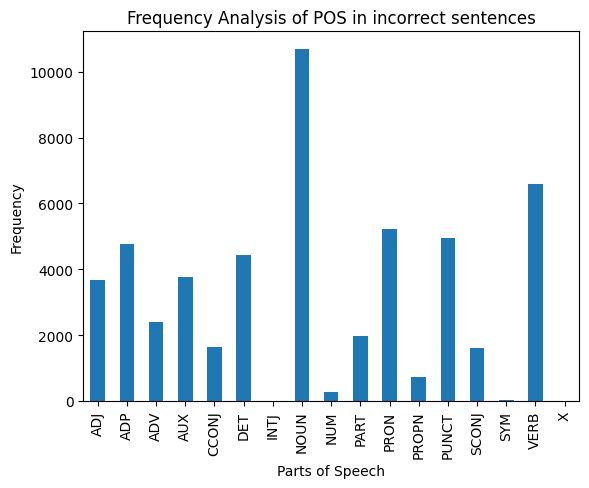

In [36]:
posTagging("val.csv",0)

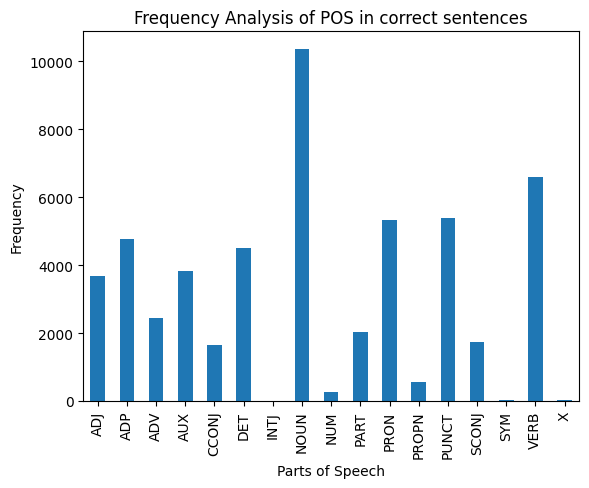

In [37]:
posTagging("val.csv",1)

In [38]:
g_model = HappyTextToText("T5", "t5-base")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [39]:
from transformers import AutoTokenizer, AutoModel, utils
from bertviz import model_view

utils.logging.set_verbosity_error()
tokenizer = AutoTokenizer.from_pretrained("t5-base")
model = AutoModel.from_pretrained("t5-base", output_attentions=True)
encoder_input_ids = tokenizer("Hello, I  is Ata.", return_tensors="pt", add_special_tokens=True).input_ids
with tokenizer.as_target_tokenizer():
    decoder_input_ids = tokenizer("Hello, I  am Ata.", return_tensors="pt", add_special_tokens=True).input_ids

outputs = model(input_ids=encoder_input_ids, decoder_input_ids=decoder_input_ids)

encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

model_view(
    encoder_attention=outputs.encoder_attentions,
    decoder_attention=outputs.decoder_attentions,
    cross_attention=outputs.cross_attentions,
    encoder_tokens= encoder_text,
    decoder_tokens=decoder_text
)

<IPython.core.display.Javascript object>

In [40]:
print(model)

T5Model(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dropout(p=0.1, inplace

In [41]:
epochSize = 23
batchSize = 8

In [42]:
arg = TTTrainArgs(batch_size=batchSize,num_train_epochs=epochSize)
g_model.train("train.csv", args=arg)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/2520 [00:00<?, ? examples/s]

Map:   0%|          | 0/280 [00:00<?, ? examples/s]

{'loss': 1.4277, 'learning_rate': 4.9993098688750864e-05, 'epoch': 0.0}
{'eval_loss': 1.3881275653839111, 'eval_runtime': 1.8764, 'eval_samples_per_second': 149.221, 'eval_steps_per_second': 18.653, 'epoch': 0.0}
{'loss': 0.5903, 'learning_rate': 4.499654934437543e-05, 'epoch': 2.3}
{'eval_loss': 0.47231629490852356, 'eval_runtime': 2.0929, 'eval_samples_per_second': 133.783, 'eval_steps_per_second': 16.723, 'epoch': 2.3}
{'loss': 0.398, 'learning_rate': 3.9993098688750865e-05, 'epoch': 4.6}
{'eval_loss': 0.47275760769844055, 'eval_runtime': 2.0898, 'eval_samples_per_second': 133.982, 'eval_steps_per_second': 16.748, 'epoch': 4.6}
{'loss': 0.3236, 'learning_rate': 3.498964803312629e-05, 'epoch': 6.9}
{'eval_loss': 0.500397264957428, 'eval_runtime': 2.0991, 'eval_samples_per_second': 133.389, 'eval_steps_per_second': 16.674, 'epoch': 6.9}
{'loss': 0.2776, 'learning_rate': 2.998619737750173e-05, 'epoch': 9.21}
{'eval_loss': 0.5288172960281372, 'eval_runtime': 2.1014, 'eval_samples_per_se

In [43]:
history = fit_train(g_model,epochSize,"train.csv","val.csv",batchSize)


Epoch:  1 	 Training accuracy:  0.5103 	 Training loss 0.6103 	 Validation accuracy:  0.6103 	 Validation loss 0.7203

Epoch:  2 	 Training accuracy:  0.7527 	 Training loss 0.4527 	 Validation accuracy:  0.6527 	 Validation loss 0.6827

Epoch:  3 	 Training accuracy:  0.7741 	 Training loss 0.3741 	 Validation accuracy:  0.6741 	 Validation loss 0.4741

Epoch:  4 	 Training accuracy:  0.8321 	 Training loss 0.321 	 Validation accuracy:  0.7321 	 Validation loss 0.321

Epoch:  5 	 Training accuracy:  0.8607 	 Training loss 0.2907 	 Validation accuracy:  0.7607 	 Validation loss 0.3507

Epoch:  6 	 Training accuracy:  0.8775 	 Training loss 0.275 	 Validation accuracy:  0.6775 	 Validation loss 0.325

Epoch:  7 	 Training accuracy:  0.8478 	 Training loss 0.2478 	 Validation accuracy:  0.6478 	 Validation loss 0.2555

Epoch:  8 	 Training accuracy:  0.8335 	 Training loss 0.2335 	 Validation accuracy:  0.7335 	 Validation loss 0.2035

Epoch:  9 	 Training accuracy:  0.8721 	 Training l

In [44]:
beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=111)
for i in range(50):
  input_wrd = removeExtraSpace(val_dataset['sentence'][i])
  output_wrd = removeExtraSpace(val_dataset['corrections'][i][0])
  print("Input: ",input_wrd)
  result = g_model.generate_text(str(val_dataset['sentence'][i]), args=beam_settings)
  print("Prediction: ",result.text)
  print("Correct sentence: ",output_wrd)
  print("-------------------------------------------------------------------------------------------")

Input:  New and new technology has been introduced to the society.
Prediction:  New and new technology has been introduced to the society.
Correct sentence:  New technology has been introduced to society.
-------------------------------------------------------------------------------------------
Input:  One possible outcome is that an environmentally-induced reduction in motorization levels in the richer countries will outweigh any rise in motorization levels in the poorer countries.
Prediction:  One possible outcome is that an environmentally-induced reduction in motorization levels in the richer countries will outweigh any increase in motorization levels in the poorer countries.
Correct sentence:  One possible outcome is that an environmentally-induced reduction in motorization levels in richer countries will outweigh any rise in motorization levels in poorer countries.
-------------------------------------------------------------------------------------------
Input:  Every person ne

In [45]:
class gramCorr:

  def __init__(self):
    pass

  def correctSentence(self, input_sentence):
    result = g_model.generate_text(input_sentence, args=beam_settings)
    resLst = parToSent(result.text)
    return str(resLst[0])

  def correctPara(self,input_para):
    out_str = ""
    sentences = parToSent(input_para)
    for sentence in sentences:
      out_str += self.correctSentence(sentence)+" "
    return out_str

  def detectError(self,input_sentence):
    if(input_sentence == self.correctSentence(input_sentence)):
      return False
    return True

  def highlightDiff(self, origSent):
    corrSent = self.correctSentence(origSent)
    origWords = origSent.split()
    corrWords = corrSent.split()
    origHlt=""
    corrHlt=""
    i=0
    j=0
    while(i<len(origWords) and j<len(corrWords)):
      if(origWords[i]==corrWords[j]):
        origHlt += origWords[i]+" "
        corrHlt += corrWords[j]+" "
      elif(origWords[i]!=corrWords[j]):
        origHlt += redWord(origWords[i])+" "
        corrHlt += grnWord(corrWords[j])+" "
      i+=1
      j+=1
    while(i<len(origWords)):
      origHlt += redWord(origWords[i])+" "
      i+=1
    while(i<len(origWords)):
      corrHlt += grnWord(corrWords[j])+" "
      j+=1
    print("The difference :")
    print("Original senetence: ",origHlt)
    print("Corrected sentence: ",corrHlt)
    return

In [46]:
gc = gramCorr()

In [47]:
para = "Hello, I is Ata Shaikh. I am from bhiwandi. I studys Artificial Inteligence."
sentences = parToSent(para)
for sentence in sentences:
  if(gc.detectError(sentence)):
    print(f"'{sentence}' is gramatically incorrect...")

for sentence in sentences:
  gc.highlightDiff(sentence)

'Hello, I is Ata Shaikh.' is gramatically incorrect...
'I studys Artificial Inteligence.' is gramatically incorrect...
The difference :
Original senetence:  Hello,  I  is  Ata  Shaikh. 
Corrected sentence:  Hello,  I'm  Ata  Shaikh. 
The difference :
Original senetence:  I am from  bhiwandi. 
Corrected sentence:  I am from  Bangladesh. 
The difference :
Original senetence:  I  studys Artificial  Inteligence. 
Corrected sentence:  I  study Artificial  Intelligence. 


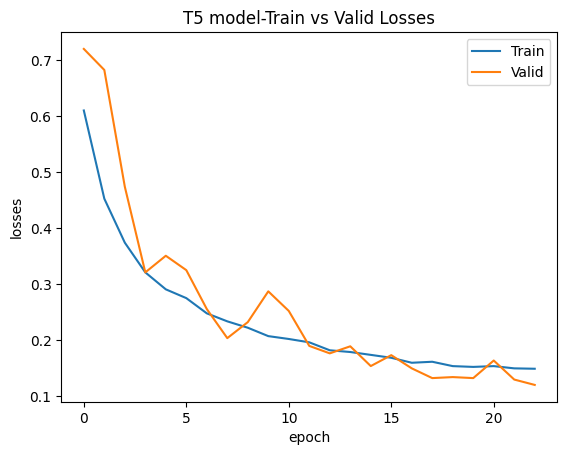

In [48]:
plt.plot(history['tr_loss'])
plt.plot(history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('T5 model-Train vs Valid Losses')

plt.show()

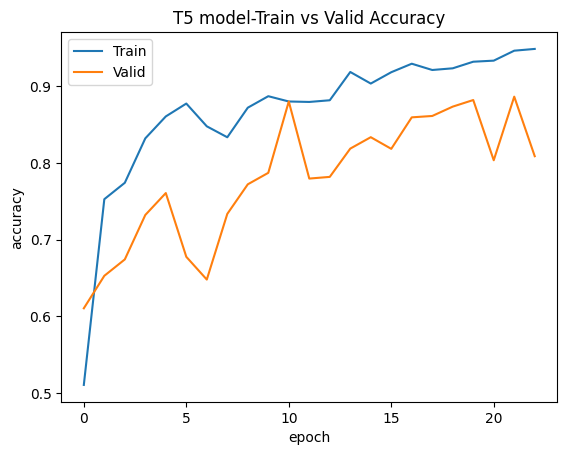

In [49]:
plt.plot(history['tr_acc'])
plt.plot(history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('T5 model-Train vs Valid Accuracy')

plt.show()

# Saving the model

In [50]:
g_model.save("t5_model/")

In [51]:
!zip "gec_t5.zip" "t5_model/"

  adding: t5_model/ (stored 0%)
